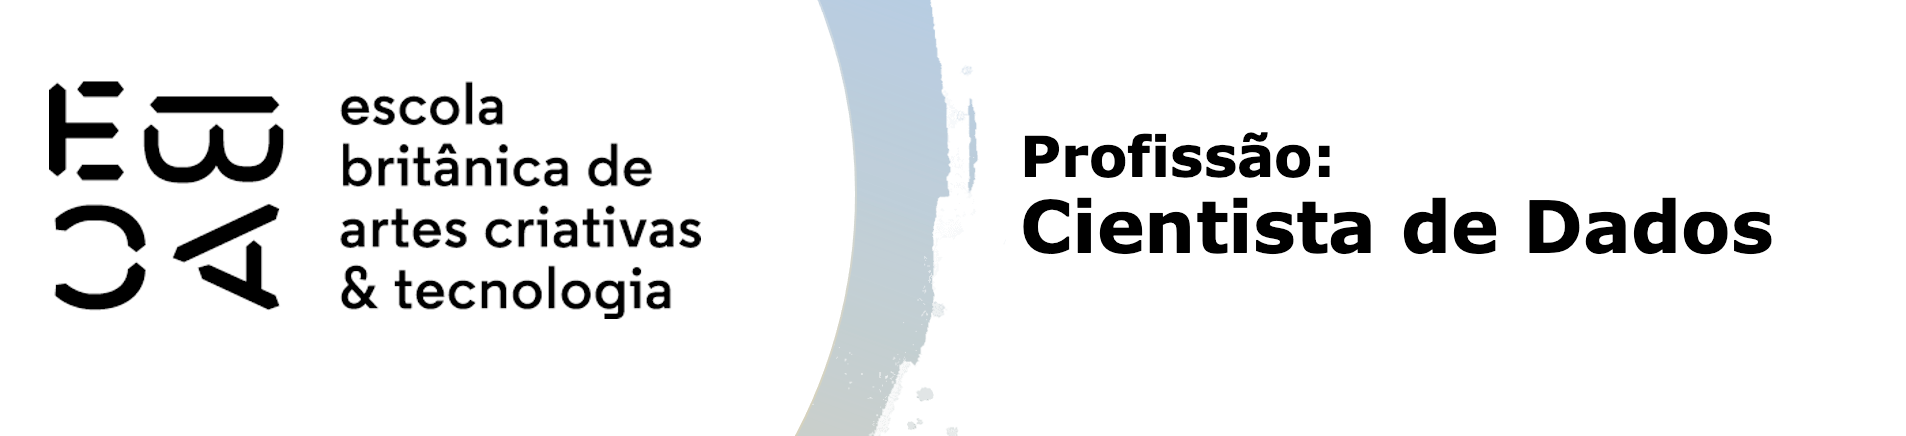

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.interpolate import interp1d

from joblib import dump, load

In [2]:
# Importando dados
df = pd.read_csv('../34_modulo/data/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
# Verificando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               750000 non-null  object 
 1   index                  750000 non-null  int64  
 2   sexo                   750000 non-null  object 
 3   posse_de_veiculo       750000 non-null  object 
 4   posse_de_imovel        750000 non-null  object 
 5   qtd_filhos             750000 non-null  int64  
 6   tipo_renda             750000 non-null  object 
 7   educacao               750000 non-null  object 
 8   estado_civil           750000 non-null  object 
 9   tipo_residencia        750000 non-null  object 
 10  idade                  750000 non-null  int64  
 11  tempo_emprego          624240 non-null  float64
 12  qt_pessoas_residencia  750000 non-null  float64
 13  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(8)
m

In [4]:
# Copiando a df original apenas as colunas de interesse
df_copy = df.sample(500).copy()

# Substituindo os valores faltantes pela média
df_copy.fillna({'tempo_emprego': np.mean(df_copy['tempo_emprego'])}, inplace=True)

# Obtendo o log da renda
df_copy.loc[:, 'renda_log'] = np.log(df_copy['renda'])

# Convertendo a classe da coluna data_ref para datetime
df_copy['data_ref'] = pd.to_datetime(df_copy['data_ref'])

df_copy = load("./data/df_copy")

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 359357 to 53057
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               500 non-null    datetime64[ns]
 1   index                  500 non-null    int64         
 2   sexo                   500 non-null    object        
 3   posse_de_veiculo       500 non-null    object        
 4   posse_de_imovel        500 non-null    object        
 5   qtd_filhos             500 non-null    int64         
 6   tipo_renda             500 non-null    object        
 7   educacao               500 non-null    object        
 8   estado_civil           500 non-null    object        
 9   tipo_residencia        500 non-null    object        
 10  idade                  500 non-null    int64         
 11  tempo_emprego          500 non-null    float64       
 12  qt_pessoas_residencia  500 non-null    float64       
 13  ren

In [5]:
# Obtendo a base de teste
df_copy_test = df_copy.tail(int(len(df_copy)*.1))
df_copy_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 172698 to 53057
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               50 non-null     datetime64[ns]
 1   index                  50 non-null     int64         
 2   sexo                   50 non-null     object        
 3   posse_de_veiculo       50 non-null     object        
 4   posse_de_imovel        50 non-null     object        
 5   qtd_filhos             50 non-null     int64         
 6   tipo_renda             50 non-null     object        
 7   educacao               50 non-null     object        
 8   estado_civil           50 non-null     object        
 9   tipo_residencia        50 non-null     object        
 10  idade                  50 non-null     int64         
 11  tempo_emprego          50 non-null     float64       
 12  qt_pessoas_residencia  50 non-null     float64       
 13  rend

In [6]:
# Obtendo a base de treino
df_copy_train = df_copy.drop(df_copy_test.index)
df_copy_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 359357 to 668521
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               450 non-null    datetime64[ns]
 1   index                  450 non-null    int64         
 2   sexo                   450 non-null    object        
 3   posse_de_veiculo       450 non-null    object        
 4   posse_de_imovel        450 non-null    object        
 5   qtd_filhos             450 non-null    int64         
 6   tipo_renda             450 non-null    object        
 7   educacao               450 non-null    object        
 8   estado_civil           450 non-null    object        
 9   tipo_residencia        450 non-null    object        
 10  idade                  450 non-null    int64         
 11  tempo_emprego          450 non-null    float64       
 12  qt_pessoas_residencia  450 non-null    float64       
 13  re

In [7]:
# Retirando colunas que não serão usadas
df_copy_test = df_copy_test.drop(['data_ref','index', 'renda'], axis=1)
df_copy_train = df_copy_train.drop(['data_ref','index', 'renda'], axis=1)

display(df_copy_test.info())
display(df_copy_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 172698 to 53057
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   50 non-null     object 
 1   posse_de_veiculo       50 non-null     object 
 2   posse_de_imovel        50 non-null     object 
 3   qtd_filhos             50 non-null     int64  
 4   tipo_renda             50 non-null     object 
 5   educacao               50 non-null     object 
 6   estado_civil           50 non-null     object 
 7   tipo_residencia        50 non-null     object 
 8   idade                  50 non-null     int64  
 9   tempo_emprego          50 non-null     float64
 10  qt_pessoas_residencia  50 non-null     float64
 11  renda_log              50 non-null     float64
dtypes: float64(3), int64(2), object(7)
memory usage: 5.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 359357 to 668521
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   450 non-null    object 
 1   posse_de_veiculo       450 non-null    object 
 2   posse_de_imovel        450 non-null    object 
 3   qtd_filhos             450 non-null    int64  
 4   tipo_renda             450 non-null    object 
 5   educacao               450 non-null    object 
 6   estado_civil           450 non-null    object 
 7   tipo_residencia        450 non-null    object 
 8   idade                  450 non-null    int64  
 9   tempo_emprego          450 non-null    float64
 10  qt_pessoas_residencia  450 non-null    float64
 11  renda_log              450 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 45.7+ KB


None

In [8]:
# Define a suavização dos dados na variável lowess
lowess = sm.nonparametric.lowess(df_copy_train['renda_log'], df_copy_train['tempo_emprego'], frac=1/9)

# Valores de X e Y suavizados
f = interp1d(lowess[:, 0], lowess[:, 1], bounds_error=False)

df_copy_train.loc[:, 'tempo_emprego_lowess'] = f(df_copy_train['tempo_emprego'])
df_copy_train.head()

d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda_log,tempo_emprego_lowess
359357,F,N,N,0,Assalariado,Superior completo,Casado,Casa,46,0.536986,2.0,7.913583,8.020619
729133,F,N,S,0,Pensionista,Médio,Casado,Casa,58,7.664838,2.0,8.646321,9.847651
384335,M,S,S,0,Empresário,Médio,Casado,Casa,49,4.947945,2.0,8.523984,8.816582
521679,M,S,S,1,Assalariado,Médio,Casado,Casa,27,0.857534,3.0,8.605151,8.276237
401774,M,N,S,0,Pensionista,Superior completo,Casado,Casa,67,7.664838,2.0,8.958594,9.847651


In [9]:
df_copy_train.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda_log',
       'tempo_emprego_lowess'],
      dtype='object')

In [10]:
# Obtendo a primeira regreção com todas as variáveis
formula = '''
            renda_log ~ 
            + sexo
            + posse_de_veiculo
            + posse_de_imovel
            + qtd_filhos
            + tipo_renda
            + educacao
            + estado_civil
            + tipo_residencia
            + idade
            + tempo_emprego
            + qt_pessoas_residencia
            + tempo_emprego_lowess
'''
reg = smf.ols(formula=formula, data=df_copy_train).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     16.09
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           2.90e-43
Time:                        13:44:42   Log-Likelihood:                -610.21
No. Observations:                 450   AIC:                             1266.
Df Residuals:                     427   BIC:                             1361.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.4711      1.482     -0.318      0.751      -3.383       2.441
sexo[T.M]                            0.0763      0.112      0.679      0.498      -0.145       0.297
posse_de_veiculo[T.S]                0.0009      0.106      0.008      0.993      -0.207       0.208
posse_de_imovel[T.S]                 0.1511      0.108      1.405      0.161      -0.060       0.363
tipo_renda[T.Empresário]             0.0730      0.116      0.628      0.530      -0.155       0.301
tipo_renda[T.Pensionista]           -1.2487      0.282     -4.425      0.000      -1.803      -0.694
tipo_renda[T.Servidor público]       0.4918      0.174      2.829      0.005       0.150       0.833
educacao[T.Médio]                    0.6838      0.500      1.368      0.172      -0.299       1.666
educacao[T.Superior completo]        0.6998      0.505      1.386      0.166      -0.292       1.692
educacao[T.Superior incompleto]      0.5433      0.539      1.008      0.314      -0.516       1.603
estado_civil[T.Separado]            -0.3772      0.614     -0.614      0.540      -1.585       0.830
estado_civil[T.Solteiro]            -0.1307      0.611     -0.214      0.831      -1.331       1.070
estado_civil[T.União]               -0.2585      0.180     -1.437      0.151      -0.612       0.095
estado_civil[T.Viúvo]               -0.2015      0.627     -0.321      0.748      -1.435       1.032
tipo_residencia[T.Casa]             -0.1110      0.439     -0.253      0.801      -0.974       0.752
tipo_residencia[T.Com os pais]      -0.0797      0.494     -0.161      0.872      -1.051       0.892
tipo_residencia[T.Comunitário]      -0.1585      1.077     -0.147      0.883      -2.275       1.958
tipo_residencia[T.Estúdio]          -0.3170      0.651     -0.487      0.627      -1.596       0.962
tipo_residencia[T.Governamental]     0.0090      0.514      0.017      0.986      -1.001       1.019
qtd_filhos                           0.1288      0.597      0.216      0.829      -1.045       1.303
idade                                0.0092      0.006      1.476      0.141      -0.003       0.021
tempo_emprego                        0.0063      0.042      0.150      0.881      -0.076       0.089
qt_pessoas_residencia               -0.1039      0.591     -0.176      0.860      -1.265       1.058
tempo_emprego_lowess                 0.9469      0.318      2.974      0.003       0.321       1.573
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.232
Skew:                          -0.093   Prob(JB):                        0.328
Kurtosis:                       2.709   

In [11]:
# Obtendo a primeira regreção com todas as variáveis
formula = '''
            renda_log ~ 
            C(tipo_renda, Treatment('Pensionista')) +
            tempo_emprego_lowess
'''
reg_redc = smf.ols(formula=formula, data=df_copy_train).fit()

reg_redc = load("./data/reg_redc")

reg_redc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     86.02
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           4.40e-54
Time:                        13:44:42   Log-Likelihood:                -617.15
No. Observations:                 450   AIC:                             1244.
Df Residuals:                     445   BIC:                             1265.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      -1.3104      0.582     -2.253      0.025      -2.454      -0.167
C(tipo_renda, Treatment('Pensionista'))[T.Assalariado]          1.1131      0.137      8.100      0.000       0.843       1.383
C(tipo_renda, Treatment('Pensionista'))[T.Empresário]           1.1756      0.156      7.537      0.000       0.869       1.482
C(tipo_renda, Treatment('Pensionista'))[T.Servidor público]     1.5634      0.195      8.011      0.000       1.180       1.947
tempo_emprego_lowess                                            1.0139      0.058     17.513      0.000       0.900       1.128
==============================================================================
Omnibus:                        1.040   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                1.102
Skew:                          -0.058   Prob(JB):                        0.576
Kurtosis:                       2.787   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

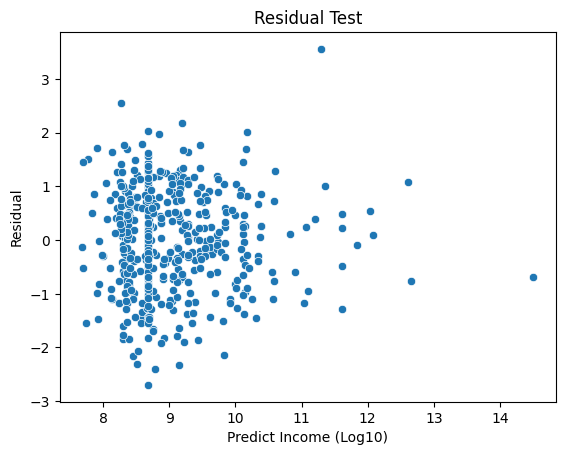

In [12]:
plt.title("Residual Test")
sns.scatterplot(
    x=reg_redc.predict(),
    y=reg_redc.resid
)
plt.xlabel("Predict Income (Log10)")
plt.ylabel("Residual")
plt.show()

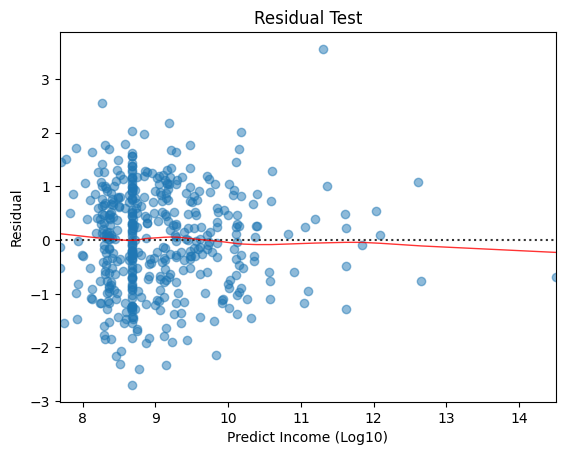

In [13]:
plt.title("Residual Test")
sns.residplot(
    x=reg_redc.predict(),
    y='renda_log',
    data=df_copy_train,
    lowess=True,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)
plt.xlabel("Predict Income (Log10)")
plt.ylabel("Residual")
plt.show()

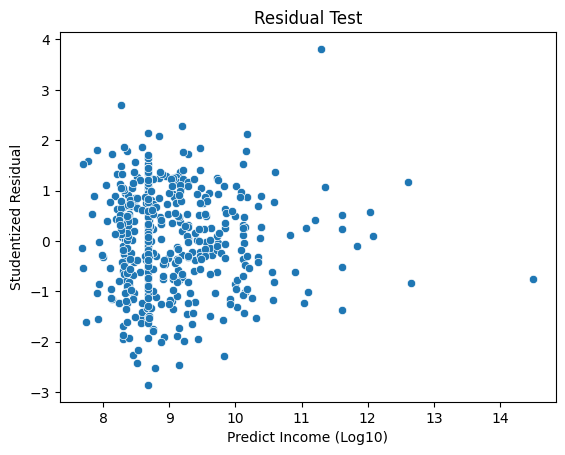

In [14]:
plt.title("Residual Test")
sns.scatterplot(
    x=reg_redc.predict(),
    y=reg_redc.outlier_test().student_resid # residual divided by its estimated standard deviation.
)
plt.xlabel("Predict Income (Log10)")
plt.ylabel("Studentized Residual")
plt.show()

d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


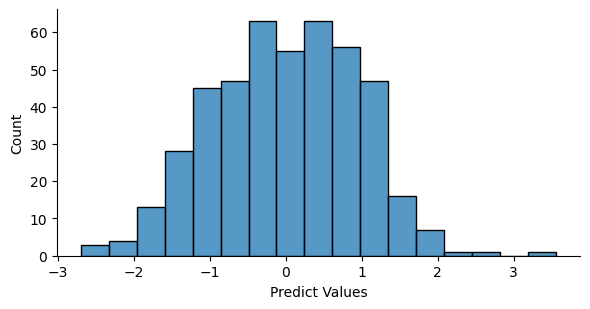

In [15]:
# plt.title("Residual Test")
sns.displot(
    reg_redc.resid,
    height=3,
    aspect=2
)
plt.xlabel("Predict Values")
plt.show()

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

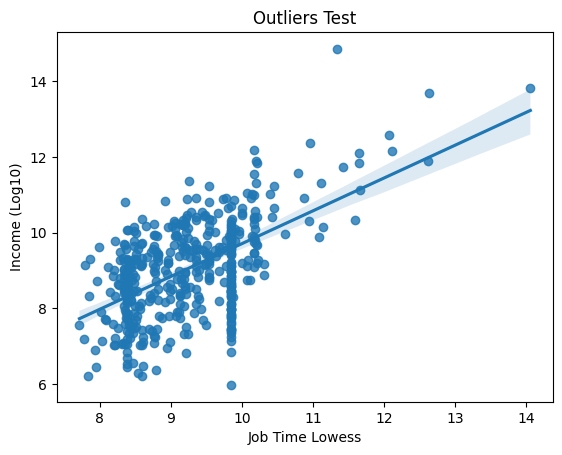

In [16]:
fig, ax = plt.subplots()
sns.regplot(
    x='tempo_emprego_lowess',
    y='renda_log',
    data=df_copy_train,
    ax=ax,
)
ax.set(
    title="Outliers Test",
    xlabel="Job Time Lowess",
    ylabel="Income (Log10)",
)
plt.show()

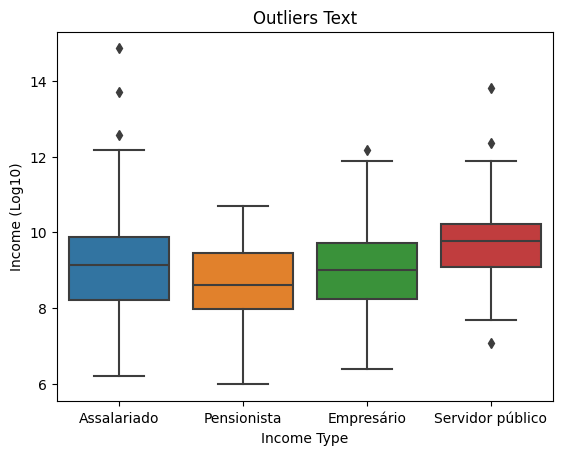

In [17]:
fig, ax = plt.subplots()
sns.boxplot(
    x='tipo_renda',
    y='renda_log',
    data=df_copy_train,
    ax=ax,
)
ax.set(
    title="Outliers Text",
    xlabel="Income Type",
    ylabel="Income (Log10)",
)
plt.show()

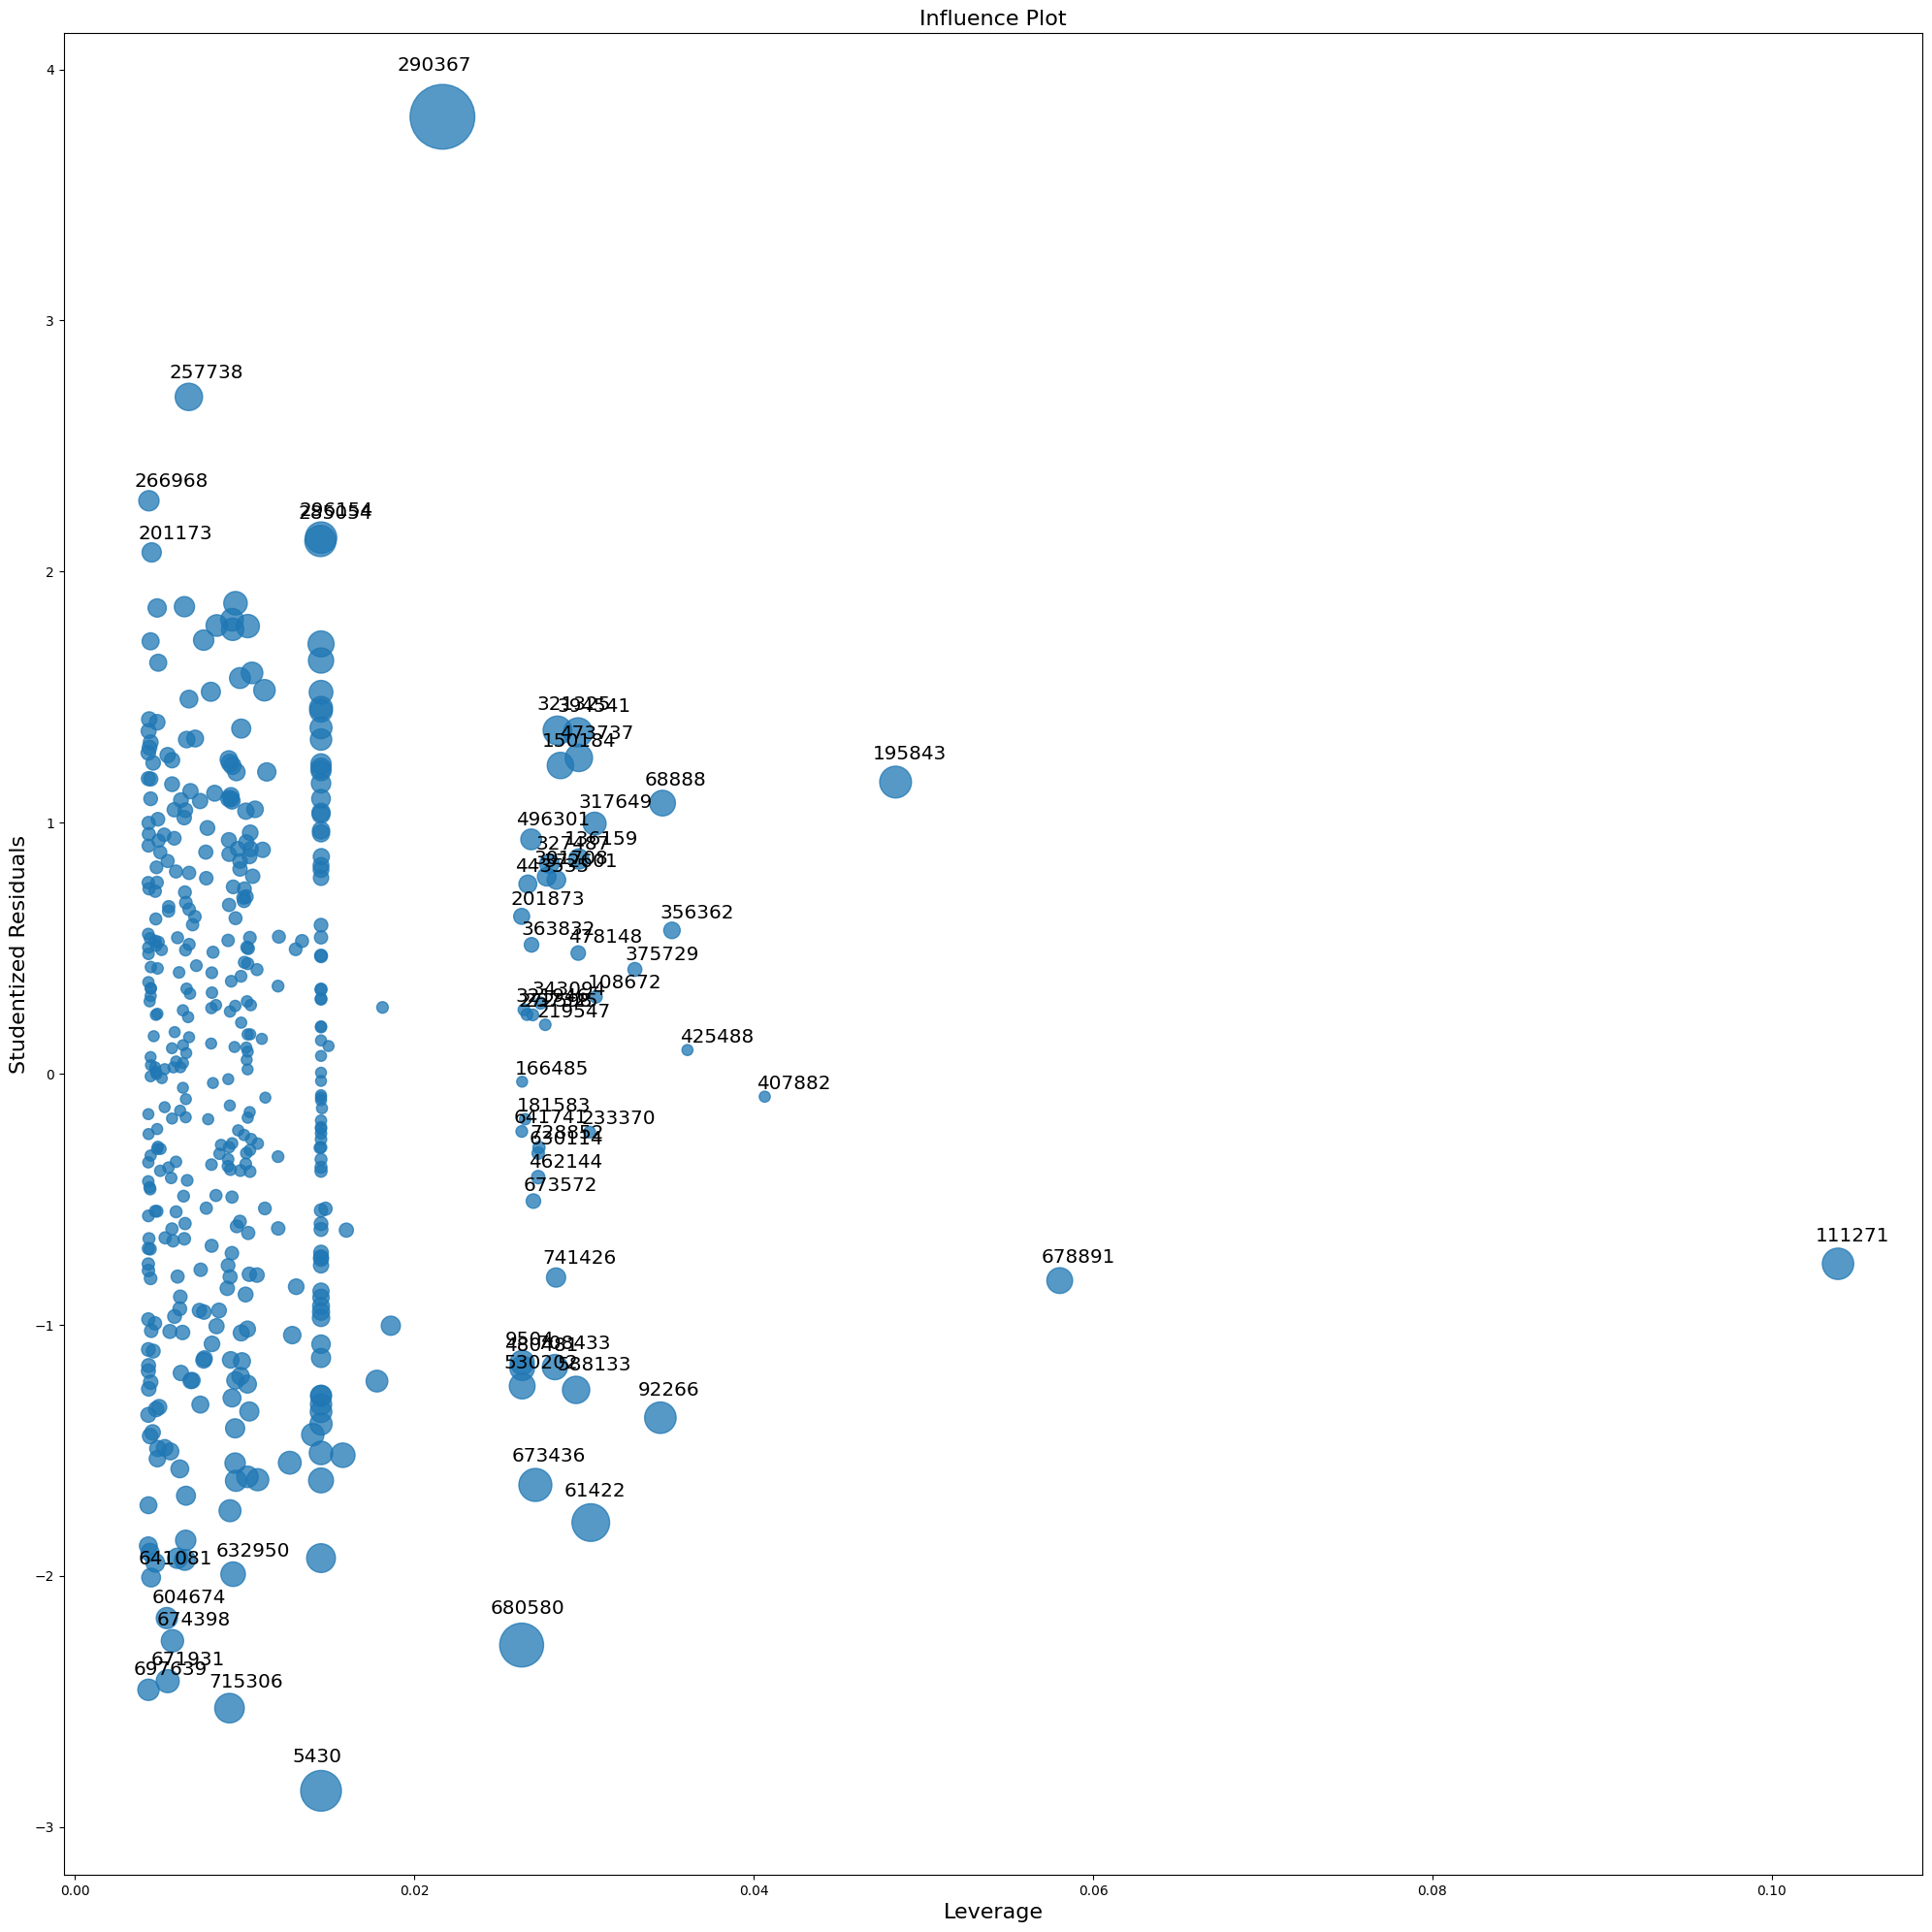

In [18]:
fig = sm.graphics.influence_plot(reg_redc, criterion="cooks")
fig.set_figheight(20)
fig.set_figwidth(20)
fig.tight_layout(pad=1.0)
plt.show()

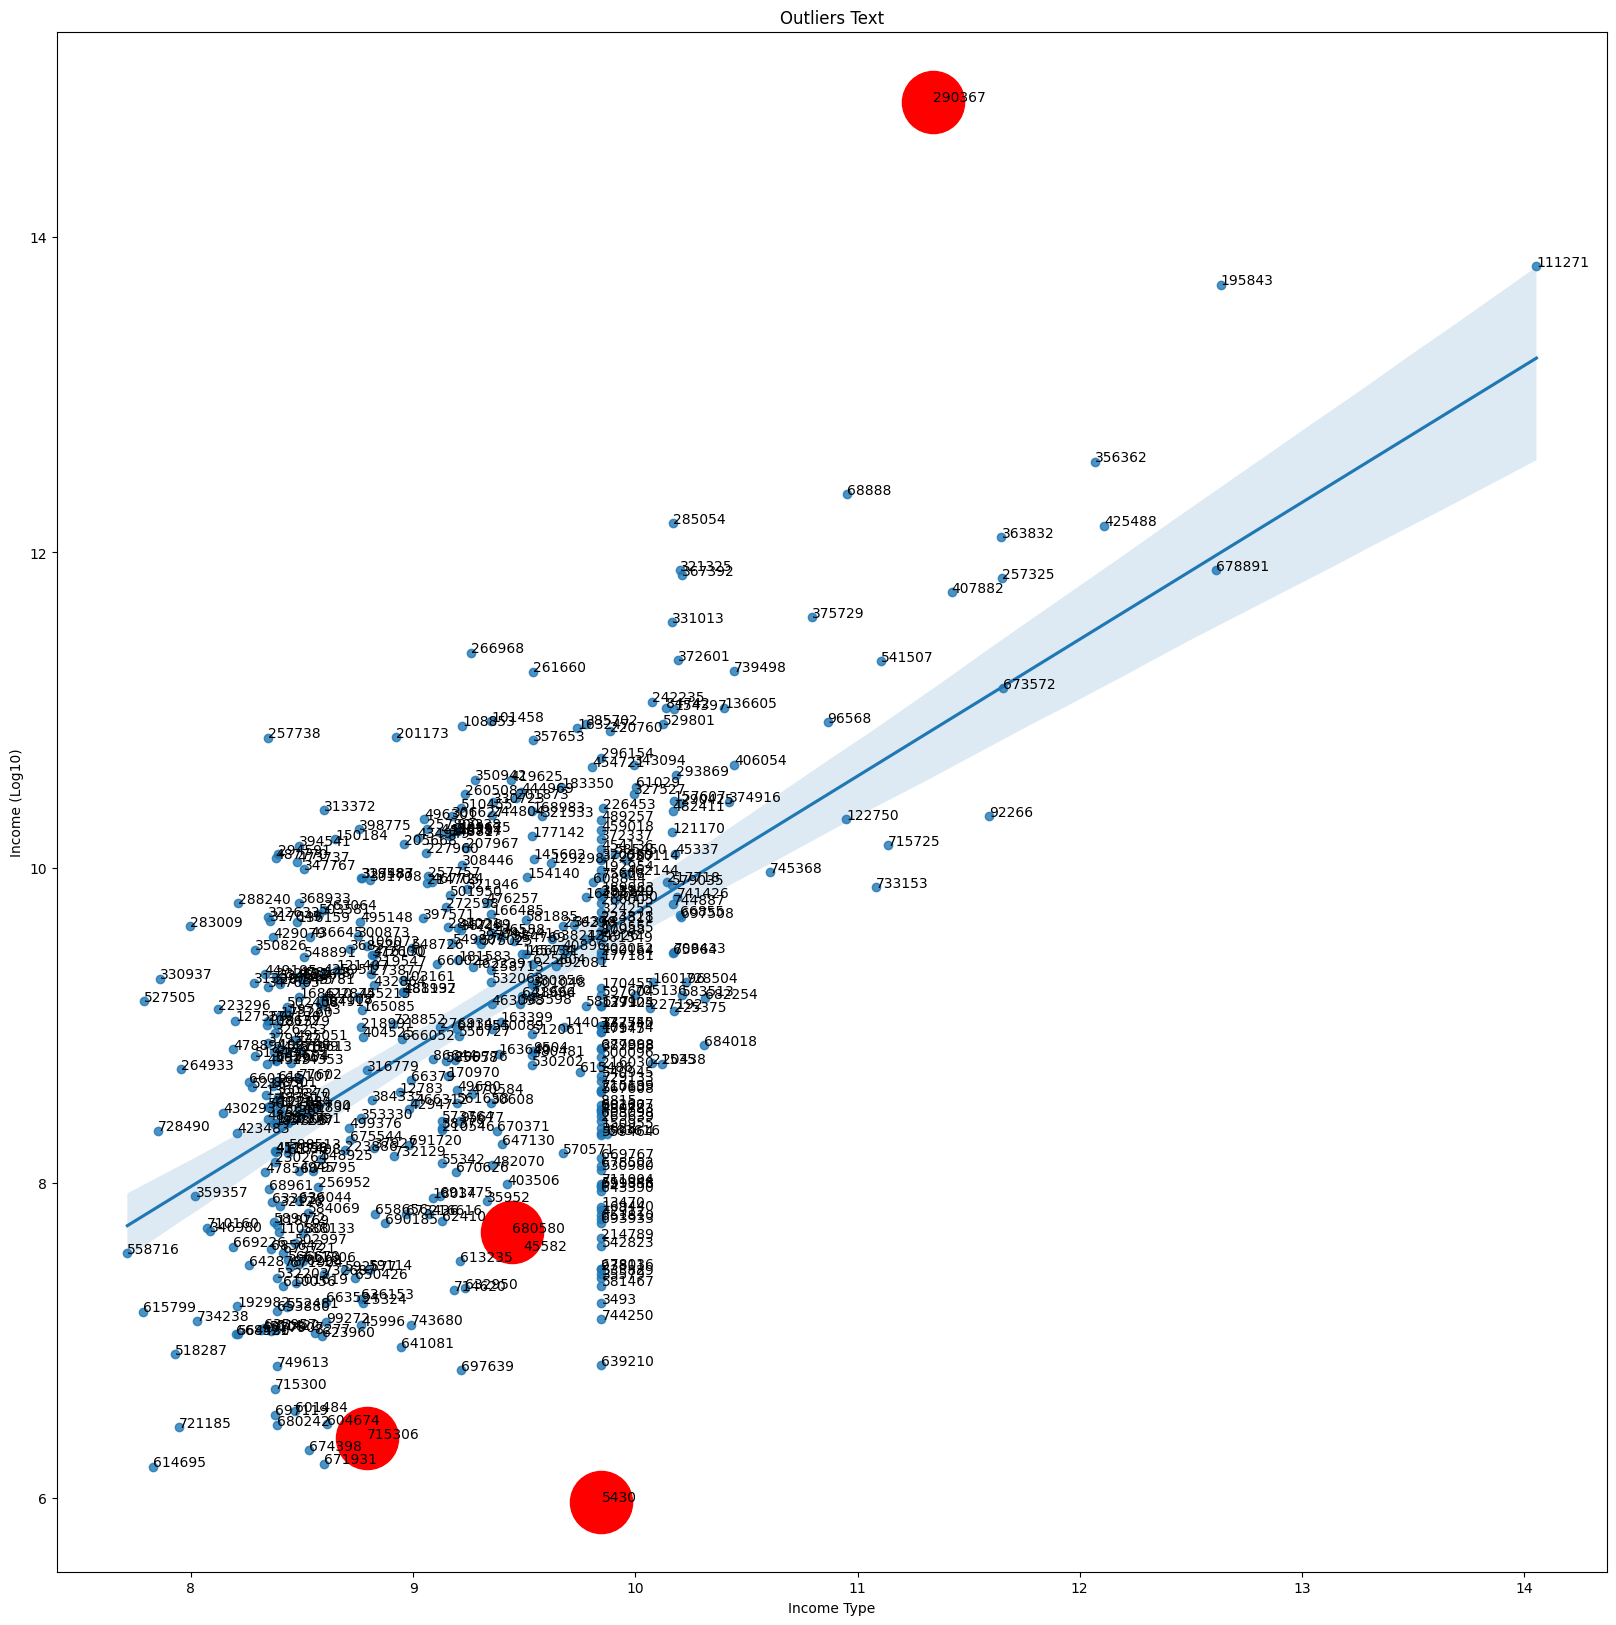

In [19]:
texte_index = [5430, 680580, 715306, 290367]
fig, ax = plt.subplots(figsize=(20,20))
sns.regplot(
    x='tempo_emprego_lowess',
    y='renda_log',
    data=df_copy_train,
    ax=ax,
)
for i, txt in enumerate(df_copy_train.index.values):
    ax.annotate(str(txt), (df_copy_train.iloc[i,-1], df_copy_train.iloc[i,-2]))
    if txt in texte_index:
        x = df_copy_train.iloc[i,-1]
        y = df_copy_train.iloc[i,-2]
        plt.scatter(x, y, color='red', s=2_000)

ax.set(
    title="Outliers Text",
    xlabel="Income Type",
    ylabel="Income (Log10)",
)
plt.show()

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.